In [85]:
import pickle
import pandas as pd
import numpy as np
from ast import literal_eval
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Concatenate, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from skimage.transform import resize
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split



In [2]:
data = pd.read_pickle("LSWMD.pkl")
print(data)

                                                 waferMap  dieSize   lotName  \
0       [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   1683.0      lot1   
1       [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   1683.0      lot1   
2       [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   1683.0      lot1   
3       [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   1683.0      lot1   
4       [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   1683.0      lot1   
...                                                   ...      ...       ...   
811452  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...    600.0  lot47542   
811453  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1,...    600.0  lot47542   
811454  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...    600.0  lot47542   
811455  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,...    600.0  lot47543   
811456  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...    600.0  lot47543   

        waferIndex trianTestLabel    fa

In [3]:
print(data.isnull().sum())

waferMap          0
dieSize           0
lotName           0
waferIndex        0
trianTestLabel    0
failureType       0
dtype: int64


In [4]:
print(data.isna().sum())

waferMap          0
dieSize           0
lotName           0
waferIndex        0
trianTestLabel    0
failureType       0
dtype: int64


In [5]:
data.columns

Index(['waferMap', 'dieSize', 'lotName', 'waferIndex', 'trianTestLabel',
       'failureType'],
      dtype='object')

In [6]:
data['dieSize'] = data['dieSize'].astype(int)
data['waferIndex'] = data['waferIndex'].astype(int)

print(data['dieSize'])
print(data['waferIndex'])

0         1683
1         1683
2         1683
3         1683
4         1683
          ... 
811452     600
811453     600
811454     600
811455     600
811456     600
Name: dieSize, Length: 811457, dtype: int64
0          1
1          2
2          3
3          4
4          5
          ..
811452    23
811453    24
811454    25
811455     1
811456     2
Name: waferIndex, Length: 811457, dtype: int64


In [7]:
print(data)

                                                 waferMap  dieSize   lotName  \
0       [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...     1683      lot1   
1       [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...     1683      lot1   
2       [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...     1683      lot1   
3       [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...     1683      lot1   
4       [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...     1683      lot1   
...                                                   ...      ...       ...   
811452  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...      600  lot47542   
811453  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1,...      600  lot47542   
811454  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...      600  lot47542   
811455  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,...      600  lot47543   
811456  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...      600  lot47543   

        waferIndex trianTestLabel    fa

In [8]:
data['lotNumber'] = data['lotName'].str.extract('(\d+)').astype(int)
print(data[['lotName', 'lotNumber']])

         lotName  lotNumber
0           lot1          1
1           lot1          1
2           lot1          1
3           lot1          1
4           lot1          1
...          ...        ...
811452  lot47542      47542
811453  lot47542      47542
811454  lot47542      47542
811455  lot47543      47543
811456  lot47543      47543

[811457 rows x 2 columns]


In [9]:
data.drop('lotName', axis=1, inplace=True)
print(data.head())

                                            waferMap  dieSize  waferIndex  \
0  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...     1683           1   
1  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...     1683           2   
2  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...     1683           3   
3  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...     1683           4   
4  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...     1683           5   

  trianTestLabel failureType  lotNumber  
0   [[Training]]    [[none]]          1  
1   [[Training]]    [[none]]          1  
2   [[Training]]    [[none]]          1  
3   [[Training]]    [[none]]          1  
4   [[Training]]    [[none]]          1  


In [10]:
def safely_extract_first_item(items):
    if isinstance(items, list) and items:  
        return ' '.join(items)  
    elif items is None:
        return 'Unknown'  
    else:
        return str(items)

def extract_list_items(item):
    if pd.isna(item) or item == 'nan':
        return 'Unknown'
    try:
        evaluated_item = literal_eval(item)
        if isinstance(evaluated_item, list) and evaluated_item:
            return evaluated_item[0]
        else:
            return 'Invalid format'
    except (ValueError, SyntaxError):
        return 'Invalid format'
    

data['trianTestLabel'] = data['trianTestLabel'].str[0].apply(safely_extract_first_item).apply(extract_list_items)
data['failureType'] = data['failureType'].str[0].apply(safely_extract_first_item).apply(extract_list_items)
print(data)

                                                 waferMap  dieSize  \
0       [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...     1683   
1       [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...     1683   
2       [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...     1683   
3       [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...     1683   
4       [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...     1683   
...                                                   ...      ...   
811452  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...      600   
811453  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1,...      600   
811454  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...      600   
811455  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,...      600   
811456  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...      600   

        waferIndex trianTestLabel failureType  lotNumber  
0                1       Training        none          1  
1                2       Training        

In [11]:
data['failureType'].unique()

array(['none', 'Loc', 'Unknown', 'Edge-Loc', 'Center', 'Edge-Ring',
       'Scratch', 'Random', 'Near-full', 'Donut'], dtype=object)

In [12]:
data['trianTestLabel'].unique()

array(['Training', 'Unknown', 'Test'], dtype=object)

In [13]:
print(data.isnull().sum())

waferMap          0
dieSize           0
waferIndex        0
trianTestLabel    0
failureType       0
lotNumber         0
dtype: int64


In [14]:
def replace_unknown_with_sampling(data, column_name):
    known_values = data[data[column_name] != 'Unknown'][column_name]
    unknown_indices = data[data[column_name] == 'Unknown'].index
    sampled_values = np.random.choice(known_values, size=len(unknown_indices), replace=True)
    data.loc[unknown_indices, column_name] = sampled_values
    
    return data

data = replace_unknown_with_sampling(data, 'trianTestLabel')
print(data)

                                                 waferMap  dieSize  \
0       [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...     1683   
1       [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...     1683   
2       [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...     1683   
3       [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...     1683   
4       [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...     1683   
...                                                   ...      ...   
811452  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...      600   
811453  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1,...      600   
811454  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...      600   
811455  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,...      600   
811456  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...      600   

        waferIndex trianTestLabel failureType  lotNumber  
0                1       Training        none          1  
1                2       Training        

In [15]:
data['trianTestLabel'].unique()

array(['Training', 'Test'], dtype=object)

In [16]:
# def replace_unknown_with_sampling(data, column_name):
#     known_values = data[data[column_name] != 'Unknown'][column_name]
#     unknown_indices = data[data[column_name] == 'Unknown'].index
#     sampled_values = np.random.choice(known_values, size=len(unknown_indices), replace=True)
#     data.loc[unknown_indices, column_name] = sampled_values
    
#     return data

# data = replace_unknown_with_sampling(data, 'failureType')
# print(data)

In [18]:
data['failureType'].unique()

array(['none', 'Loc', 'Unknown', 'Edge-Loc', 'Center', 'Edge-Ring',
       'Scratch', 'Random', 'Near-full', 'Donut'], dtype=object)

In [19]:
print(data.isnull().sum())

waferMap          0
dieSize           0
waferIndex        0
trianTestLabel    0
failureType       0
lotNumber         0
dtype: int64


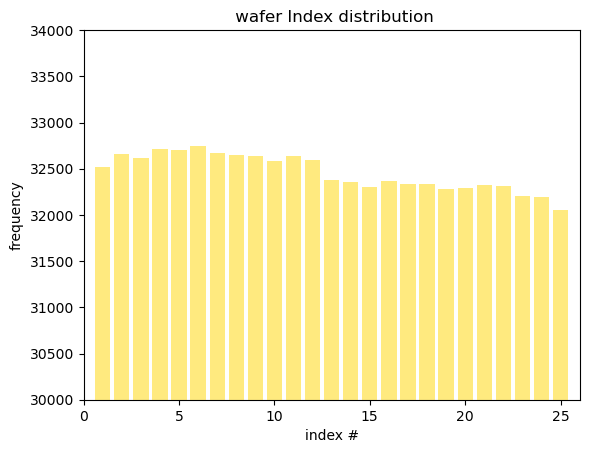

In [20]:
%matplotlib inline


uni_Index=np.unique(data.waferIndex, return_counts=True)
plt.bar(uni_Index[0],uni_Index[1], color='gold', align='center', alpha=0.5)
plt.title(" wafer Index distribution")
plt.xlabel("index #")
plt.ylabel("frequency")
plt.xlim(0,26)
plt.ylim(30000,34000)
plt.show()


In [21]:
data = data.drop(['waferIndex'], axis = 1)

In [22]:
def find_dim(x):
    dim0=np.size(x,axis=0)
    dim1=np.size(x,axis=1)
    return dim0,dim1
data['waferMapDim']=data.waferMap.apply(find_dim)
data.sample(5)

,waferMap,dieSize,trianTestLabel,failureType,lotNumber,waferMapDim
386881,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1334,Training,Unknown,23171,"(41, 42)"
505680,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2,...",710,Test,Unknown,31422,"(32, 29)"
286926,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",924,Test,Unknown,17496,"(30, 40)"
627650,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,...",712,Training,Unknown,39418,"(32, 29)"
757707,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,...",1109,Test,none,45355,"(39, 37)"


In [23]:
max(data.waferMapDim), min(data.waferMapDim)

((300, 202), (6, 21))

In [24]:
data['failureNum']=data.failureType
data['trainTestNum']=data.trianTestLabel
mapping_type={'Center':0,'Donut':1,'Edge-Loc':2,'Edge-Ring':3,'Loc':4,'Random':5,'Scratch':6,'Near-full':7,'none':8, 'Unknown':9}
mapping_traintest={'Training':0,'Test':1}
data=data.replace({'failureNum':mapping_type, 'trainTestNum':mapping_traintest})

In [25]:
tol_wafers = data.shape[0]
tol_wafers

811457

In [26]:
data_withlabel = data[(data['failureNum']>=0) & (data['failureNum']<=8)]
data_withlabel =data_withlabel.reset_index()
data_withpattern = data[(data['failureNum']>=0) & (data['failureNum']<=7)]
data_withpattern = data_withpattern.reset_index()
data_nonpattern = data[(data['failureNum']==8)]
data_withlabel.shape[0], data_withpattern.shape[0], data_nonpattern.shape[0]

(172950, 25519, 147431)

/var/folders/v5/y_xt4kxn2z5fw15ml5lwy4sc0000gn/T/ipykernel_21595/1411248044.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(labels2)


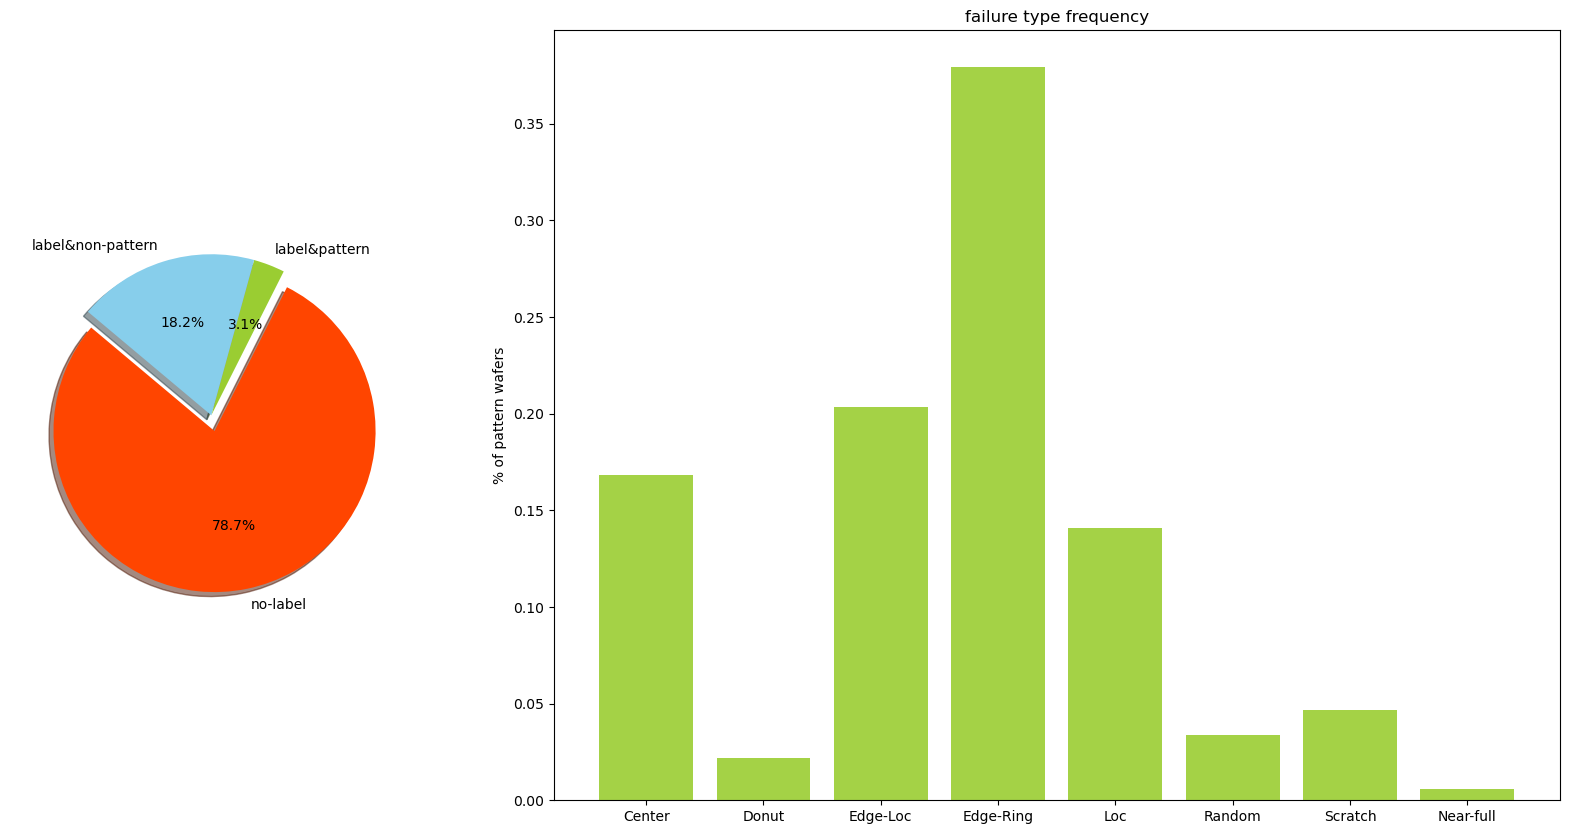

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib import gridspec
fig = plt.figure(figsize=(20,10)) 
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 2.5]) 
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])

no_wafers=[tol_wafers-data_withlabel.shape[0], data_withpattern.shape[0], data_nonpattern.shape[0]]

colors = ['orangered', 'yellowgreen', 'skyblue']
explode = (0.1, 0, 0)
labels = ['no-label','label&pattern','label&non-pattern']
ax1.pie(no_wafers, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)

uni_pattern=np.unique(data_withpattern.failureNum, return_counts=True)
labels2 = ['','Center','Donut','Edge-Loc','Edge-Ring','Loc','Random','Scratch','Near-full']
ax2.bar(uni_pattern[0],uni_pattern[1]/data_withpattern.shape[0], color='yellowgreen', align='center', alpha=0.9)
ax2.set_title("failure type frequency")
ax2.set_ylabel("% of pattern wafers")
ax2.set_xticklabels(labels2)

plt.show()

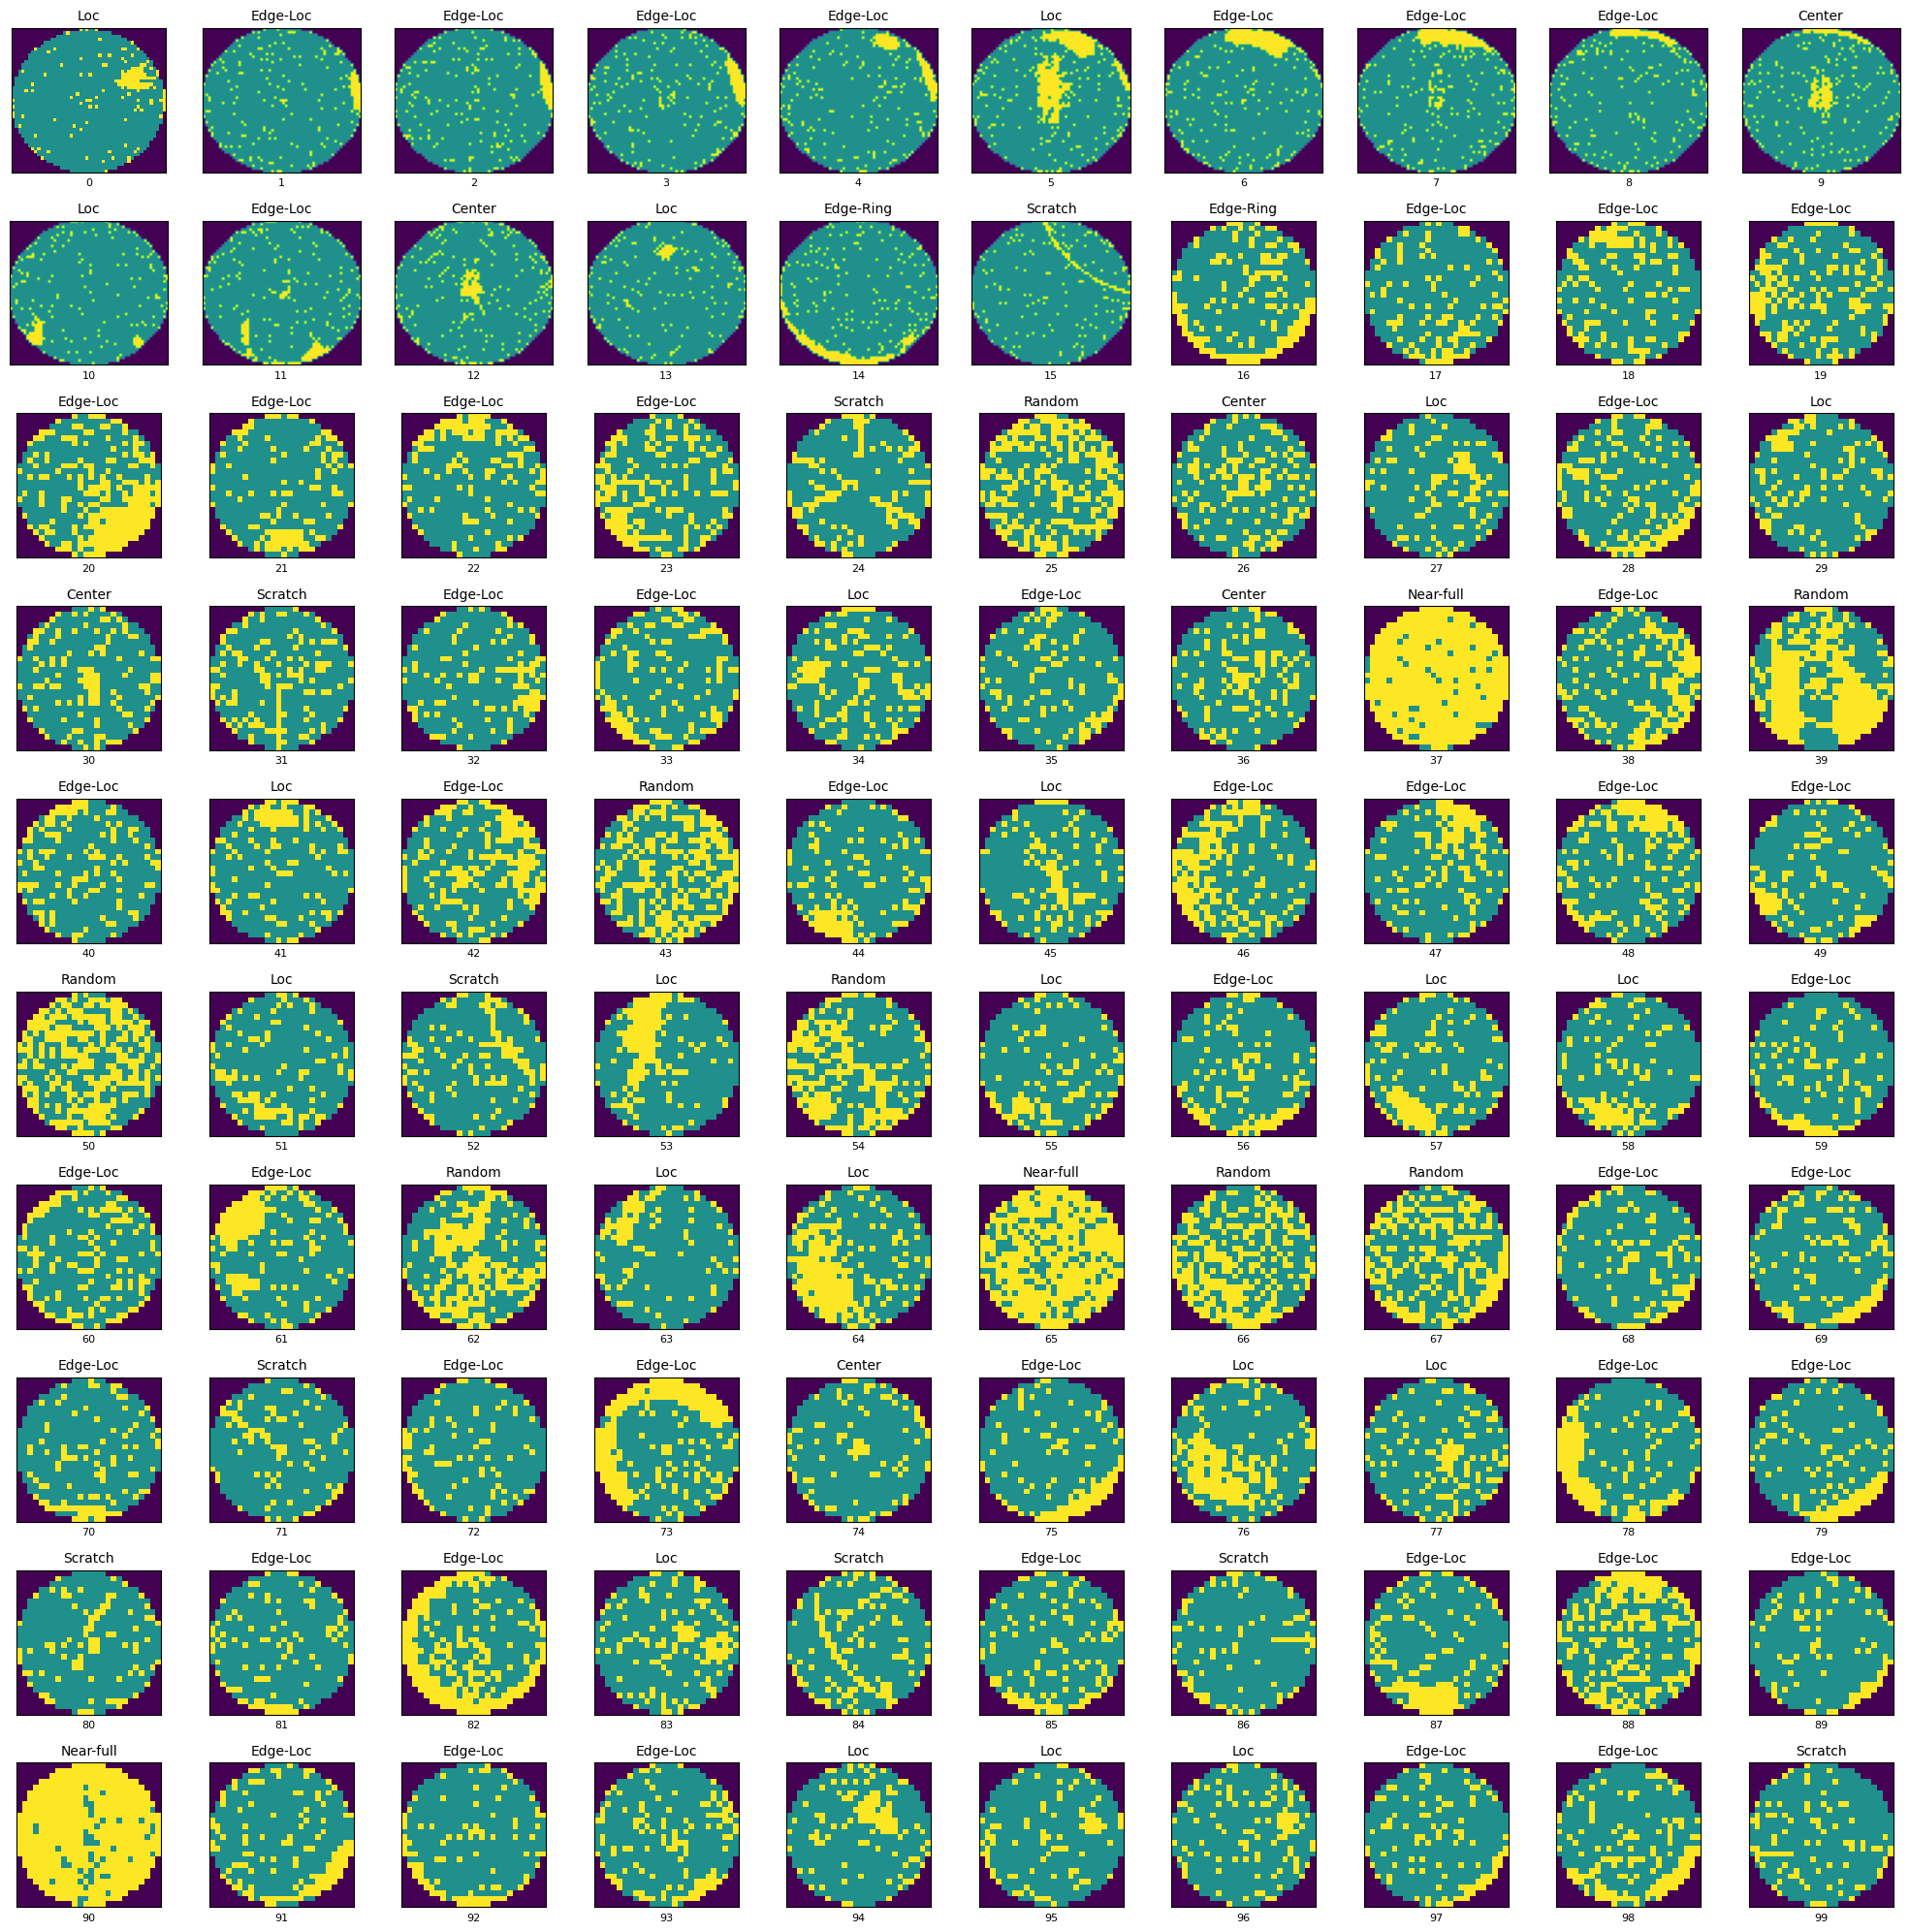

In [28]:
fig, ax = plt.subplots(nrows = 10, ncols = 10, figsize=(20, 20))
ax = ax.ravel(order='C')
for i in range(100):
    img = data_withpattern.waferMap[i]
    ax[i].imshow(img)
    ax[i].set_title(data_withpattern.failureType[i], fontsize=10)
    ax[i].set_xlabel(data_withpattern.index[i], fontsize=8)
    ax[i].set_xticks([])
    ax[i].set_yticks([])
plt.tight_layout()
plt.show() 

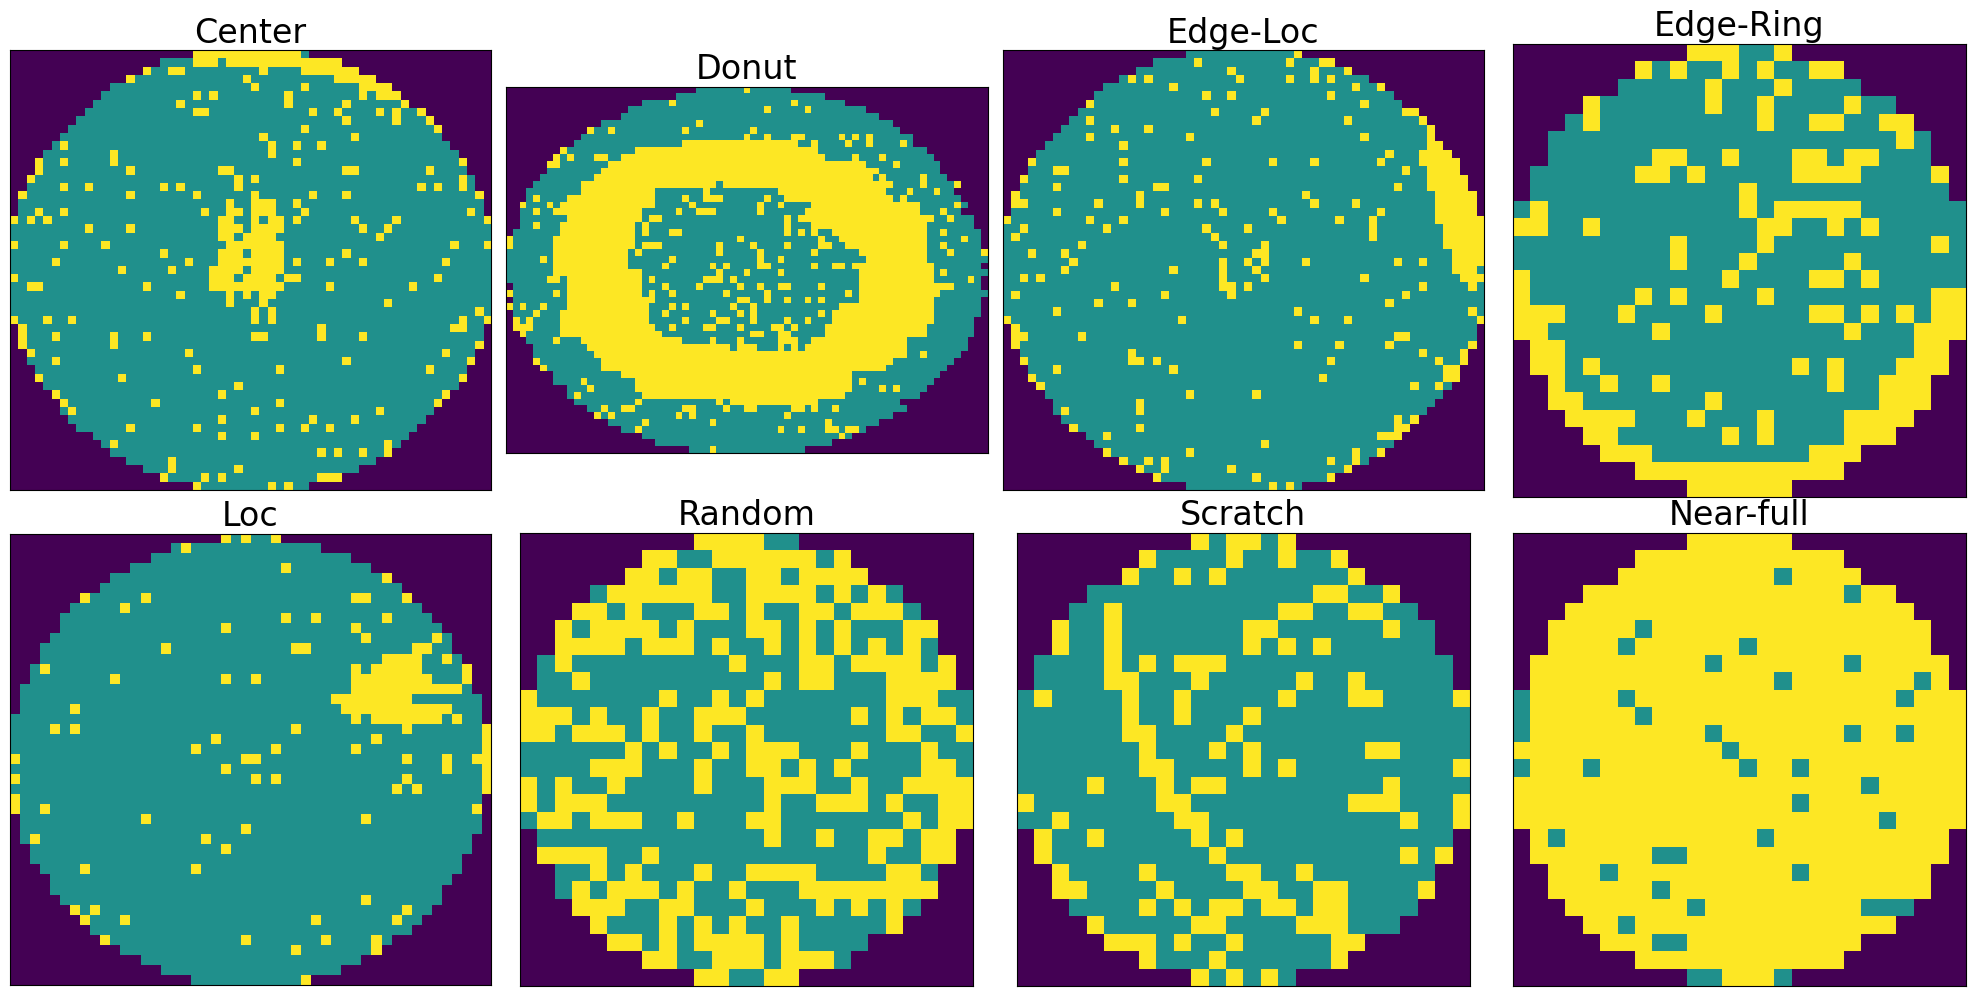

In [29]:
x = [9,340, 3, 16, 0, 25, 84, 37]
labels2 = ['Center','Donut','Edge-Loc','Edge-Ring','Loc','Random','Scratch','Near-full']

fig, ax = plt.subplots(nrows = 2, ncols = 4, figsize=(20, 10))
ax = ax.ravel(order='C')
for i in range(8):
    img = data_withpattern.waferMap[x[i]]
    ax[i].imshow(img)
    ax[i].set_title(data_withpattern.failureType[x[i]],fontsize=24)
    ax[i].set_xticks([])
    ax[i].set_yticks([])
plt.tight_layout()
plt.show() 

In [30]:
print(data)

                                                 waferMap  dieSize  \
0       [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...     1683   
1       [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...     1683   
2       [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...     1683   
3       [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...     1683   
4       [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...     1683   
...                                                   ...      ...   
811452  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...      600   
811453  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1,...      600   
811454  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...      600   
811455  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,...      600   
811456  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...      600   

       trianTestLabel failureType  lotNumber waferMapDim  failureNum  \
0            Training        none          1    (45, 48)           8   
1            Tr

In [31]:
data.columns

Index(['waferMap', 'dieSize', 'trianTestLabel', 'failureType', 'lotNumber',
       'waferMapDim', 'failureNum', 'trainTestNum'],
      dtype='object')

In [32]:
def preprocess_images(image_list, target_size):
    processed_images = []
    for img in image_list:
        img_resized = resize(img, target_size, anti_aliasing=True)
        img_normalized = img_resized / 255.0
        if img_normalized.ndim == 2:
            img_normalized = img_normalized[:, :, np.newaxis]
        processed_images.append(img_normalized)
    return np.array(processed_images)

target_size = (32, 32)  
processed_images = preprocess_images(list(data['waferMap']), target_size)

In [33]:
data.columns

Index(['waferMap', 'dieSize', 'trianTestLabel', 'failureType', 'lotNumber',
       'waferMapDim', 'failureNum', 'trainTestNum'],
      dtype='object')

In [34]:
data['waferMapDim_x'] = data['waferMapDim'].apply(lambda x: x[0] if isinstance(x, tuple) else eval(x)[0])
data['waferMapDim_y'] = data['waferMapDim'].apply(lambda x: x[1] if isinstance(x, tuple) else eval(x)[1])

In [35]:
numerical_cols = ['dieSize', 'waferMapDim_x', 'waferMapDim_y']

In [54]:
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  
    ('scaler', StandardScaler())  
])


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols)
    ])


In [56]:
data_transformed = preprocessor.fit_transform(data)

In [58]:
data_filtered = data[data['failureType'] != 'Unknown']

In [60]:
# Filter out 'Unknown' and then reset the indices
data_filtered = data[data['failureType'] != 'Unknown'].reset_index(drop=True)

# After resetting indices, recreate y_one_hot
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(data_filtered['failureType'])
y_one_hot = to_categorical(y_encoded)


In [62]:
X_images = processed_images[data_filtered.index]  
X_numerical = data_transformed[data_filtered.index]

In [63]:
print("Size of y_one_hot:", y_one_hot.shape[0])
print("Size of processed_images:", len(processed_images))  # Adjusted if applicable
print("Size of data_transformed:", len(data_transformed))

Size of y_one_hot: 172950
Size of processed_images: 811457
Size of data_transformed: 811457


In [66]:
filtered_indices = data_filtered.index
X_images = processed_images[filtered_indices]
X_numerical = data_transformed[filtered_indices]

In [68]:
print("Corrected size of y_one_hot:", y_one_hot.shape[0])
print("Corrected size of processed_images:", len(X_images))
print("Corrected size of data_transformed:", len(X_numerical))

Corrected size of y_one_hot: 172950
Corrected size of processed_images: 172950
Corrected size of data_transformed: 172950


In [70]:
from sklearn.model_selection import train_test_split
X_images_train, X_images_val, X_numerical_train, X_numerical_val, y_train, y_val = train_test_split(
    X_images, X_numerical, y_one_hot, test_size=0.2, random_state=42)

In [87]:
# Define the CNN model for image data
image_input = Input(shape=(32, 32, 1), name='image_input')
x = Conv2D(32, (3, 3), activation='relu', padding='same')(image_input)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2))(x)
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
image_branch = Model(inputs=image_input, outputs=x)

# Define the model for numerical data
numerical_input = Input(shape=(X_numerical_train.shape[1],), name='numerical_input')
y = Dense(64, activation='relu')(numerical_input)
numerical_branch = Model(inputs=numerical_input, outputs=y)

# Combine both branches
combined = Concatenate()([image_branch.output, numerical_branch.output])
z = Dense(128, activation='relu')(combined)
z = Dropout(0.5)(z)  # Consider tuning the dropout rate based on validation performance
z = Dense(y_train.shape[1], activation='softmax')(z)  # Make sure this matches the number of classes

# Final model
model = Model(inputs=[image_input, numerical_input], outputs=z)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Setup callbacks
checkpoint = ModelCheckpoint('wafer.keras', save_best_only=True, monitor='val_loss', mode='min')
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

# Train the model
history = model.fit(
    [X_images_train, X_numerical_train], y_train,
    validation_data=([X_images_val, X_numerical_val], y_val),
    epochs=20, batch_size=32,
    callbacks=[checkpoint, early_stopping]
)

# Evaluate the model
loss, accuracy = model.evaluate([X_images_val, X_numerical_val], y_val)
print(f"Validation Accuracy: {accuracy*100:.2f}%")

Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ image_input         │ (None, 32, 32, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 32, 32,    │        320 │ image_input[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 16, 16,    │          0 │ conv2d_2[0][0]    │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 16, 16,    │     18,496 │ max_pooling2d_2[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_3     │ (None, 8, 8, 64)  │          0 │ conv2d_3[0][0]    │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_1 (Flatten) │ (None, 4096)      │          0 │ max_pooling2d_3[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ numerical_input     │ (None, 3)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 256)       │  1,048,832 │ flatten_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 64)        │        256 │ numerical_input[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 320)       │          0 │ dense_4[0][0],    │
│ (Concatenate)       │                   │            │ dense_5[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_6 (Dense)     │ (None, 128)       │     41,088 │ concatenate_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 128)       │          0 │ dense_6[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_7 (Dense)     │ (None, 9)         │      1,161 │ dropout_1[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,110,153 (4.23 MB)

 Trainable params: 1,110,153 (4.23 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
4324/4324 ━━━━━━━━━━━━━━━━━━━━ 48s 11ms/step - accuracy: 0.8502 - loss: 0.7071 - val_accuracy: 0.8557 - val_loss: 0.6439
Epoch 2/20
4324/4324 ━━━━━━━━━━━━━━━━━━━━ 47s 11ms/step - accuracy: 0.8499 - loss: 0.6677 - val_accuracy: 0.8557 - val_loss: 0.6404
Epoch 3/20
4324/4324 ━━━━━━━━━━━━━━━━━━━━ 46s 11ms/step - accuracy: 0.8517 - loss: 0.6538 - val_accuracy: 0.8559 - val_loss: 0.6313
Epoch 4/20
4324/4324 ━━━━━━━━━━━━━━━━━━━━ 45s 10ms/step - accuracy: 0.8509 - loss: 0.6496 - val_accuracy: 0.8559 - val_loss: 0.6283
Epoch 5/20
4324/4324 ━━━━━━━━━━━━━━━━━━━━ 45s 10ms/step - accuracy: 0.8503 - loss: 0.6478 - val_accuracy: 0.8559 - val_loss: 0.6222
Epoch 6/20
4324/4324 ━━━━━━━━━━━━━━━━━━━━ 45s 10ms/step - accuracy: 0.8521 - loss: 0.6370 - val_accuracy: 0.8561 - val_loss: 0.6169
Epoch 7/20
4324/4324 ━━━━━━━━━━━━━━━━━━━━ 45s 10ms/step - accuracy: 0.8534 - loss: 0.6267 - val_accuracy: 0.8565 - val_loss: 0.6096
Epoch 8/20
4324/4324 ━━━━━━━━━━━━━━━━━━━━ 45s 10ms/step - accuracy: 0.8543 -

In [89]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

y_pred = model.predict([X_images_val, X_numerical_val])
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_val, axis=1)

cm = confusion_matrix(y_true_classes, y_pred_classes)
print("Confusion Matrix:\n", cm)

cr = classification_report(y_true_classes, y_pred_classes, target_names=label_encoder.classes_)
print("Classification Report:\n", cr)

1081/1081 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step
Confusion Matrix:
 [[    0     0     0    74     0     0     0     0   782]
 [    0     0     0     2     0     0     0     0    97]
 [    0     0     0    59     0     0     0     0   920]
 [    0     0     0   229     0     0     0     0  1621]
 [    0     0     0    71     0     0     0     0   691]
 [    0     0     0     0     0     0     0     0    34]
 [    0     0     0    13     0     0     6     0   136]
 [    0     0     0    23     0     0     0     0   235]
 [    0     0     0    29     0     0     0     0 29568]]
Classification Report:
               precision    recall  f1-score   support

      Center       0.00      0.00      0.00       856
       Donut       0.00      0.00      0.00        99
    Edge-Loc       0.00      0.00      0.00       979
   Edge-Ring       0.46      0.12      0.19      1850
         Loc       0.00      0.00      0.00       762
   Near-full       0.00      0.00      0.00        34
      Random       1.

/Users/arvindprashanth/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/arvindprashanth/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/arvindprashanth/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

In [91]:
model.save("wafermap.keras")

from tensorflow.keras.models import load_model
loaded_model = load_model("wafermap.keras")